# <Center> Week 13 Final Project Report

# <center> Bank Marketing (Campaign)

####  Group Name: Data Visionaries
#### Name: Abdukhakimov Asatilla
#### Email: tremendous54@gmail.com
#### Country: Uzbekistan
#### Company: Data Glacier
#### Specialization: Data Science

## Problem Description

ABC Bank wants to sell its term deposit product to customers. Before launching the product, the bank aims to develop a model to understand whether a particular customer will buy their product or not, based on the customer's past interaction with the bank or other financial institutions.

## Business Understanding 

ABC Bank aims to build a Machine Learning (ML) model to identify customers most likely to subscribe to its term deposit product. By targeting high-probability customers through telemarketing, SMS, or email campaigns, the bank can optimize resource allocation, improving conversion rates and reducing marketing costs.

The model will be developed in two scenarios: one with the 'duration' feature and one without. While the 'duration' feature may enhance accuracy, it is impractical for pre-call campaigns due to its complexity and availability only after customer interaction. The goal is to assess both models' performance to ensure a balance between technical effectiveness and business feasibility, ultimately providing a solution that is transparent, actionable, and aligned with the bank's marketing objectives.

## Data Exploration 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Check for missing values

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:")
print(missing_values if not missing_values.empty else "No missing values")


Missing Values:
No missing values


## <center> Exploratory Data Analysis (EDA)

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

### 1. Age Distribution

Text(0.5, 1.0, 'Age Distribution')

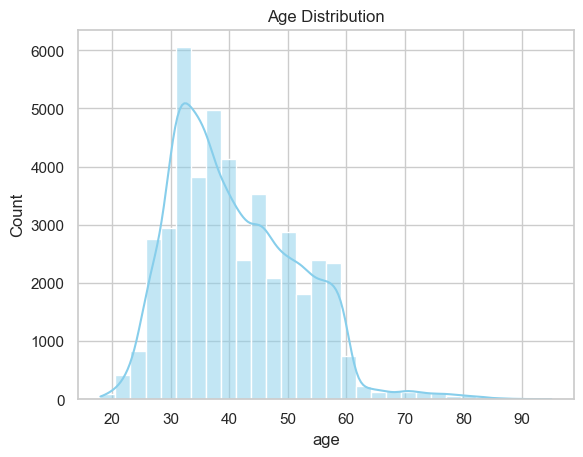

In [8]:
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")

#### Customers are mainly between 25 to 60 years old, a key demographic for term deposits

### 2. Job vs Subscription

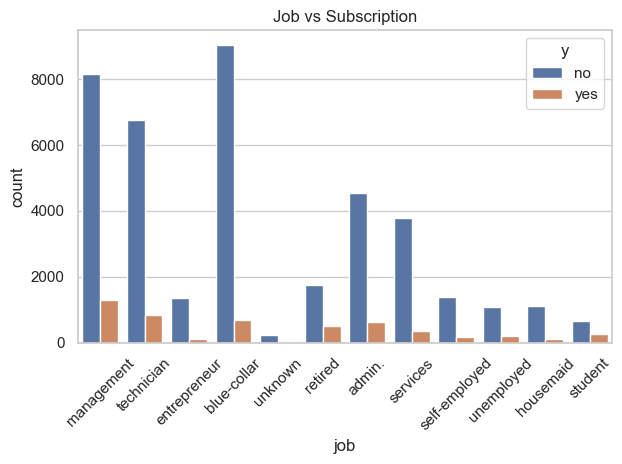

In [9]:
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.tight_layout()
plt.show()

#### Management and technician roles show higher subscription rates.

## 3. Education vs Subscription

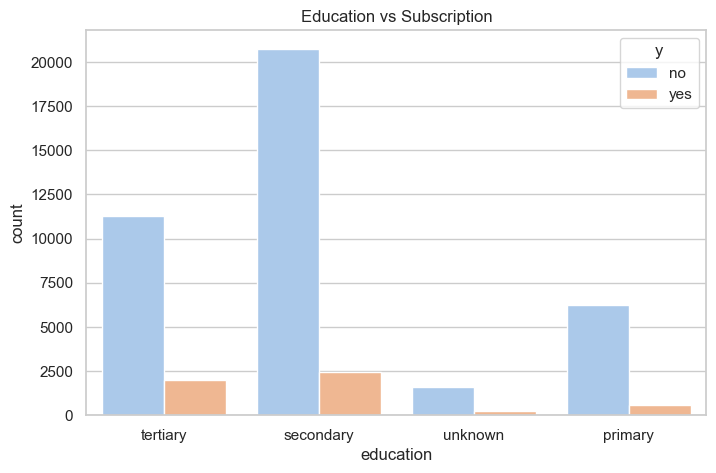

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='y', palette='pastel')
plt.title("Education vs Subscription")
plt.show()

#### Tertiary educated customers are more likely to subscribe.

## 4. Marital Status vs Subscription

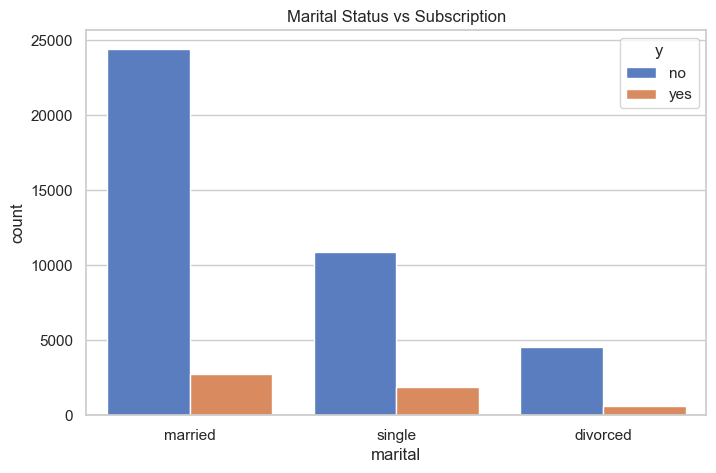

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', hue='y', palette='muted')
plt.title("Marital Status vs Subscription")
plt.show()

#### Single customers tend to have higher subscription rates than married/divorced

## 5. Housing Loan Status

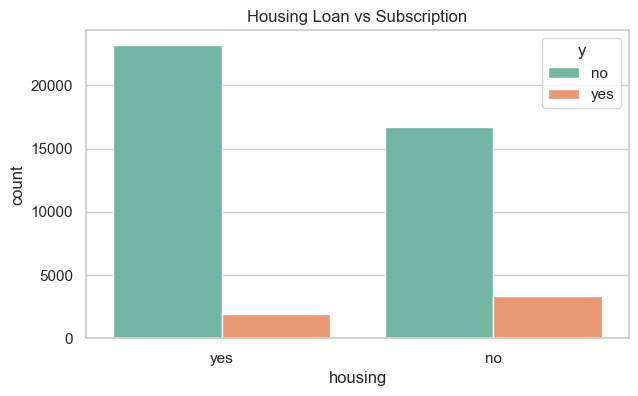

In [12]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='housing', hue='y', palette='Set2')
plt.title("Housing Loan vs Subscription")
plt.show()

#### Customers without housing loans appear slightly more likely to subscribe

## 6. Personal Loan Status

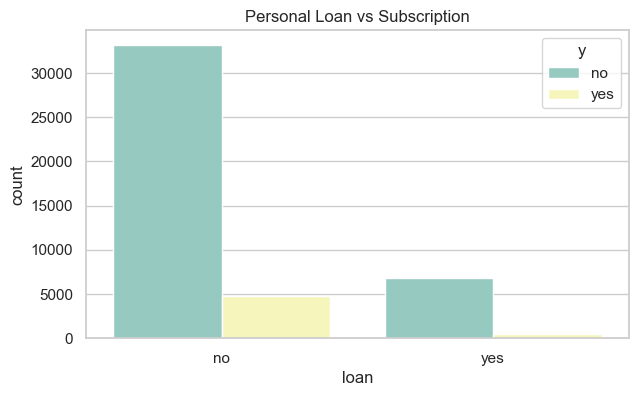

In [13]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='loan', hue='y', palette='Set3')
plt.title("Personal Loan vs Subscription")
plt.show()

#### Those without personal loans show better subscription interest

## 7. Balance Distribution (Zoomed In)

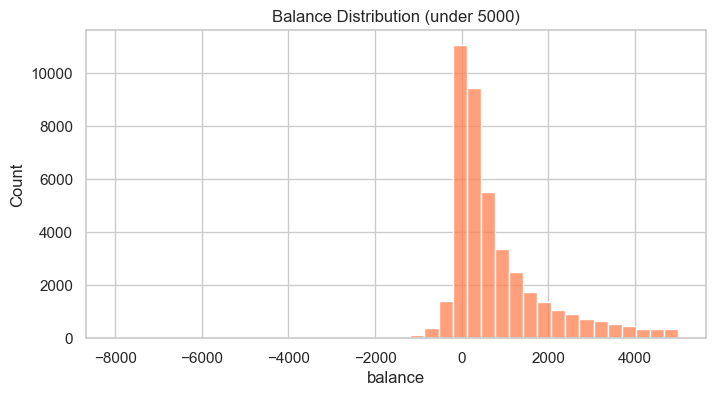

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df[df['balance'] < 5000]['balance'], bins=40, color='coral')
plt.title("Balance Distribution (under 5000)")
plt.show()

#### Most customers have balances under 5000, indicating a middle-income audience

## 8. Contact Method vs Subscription

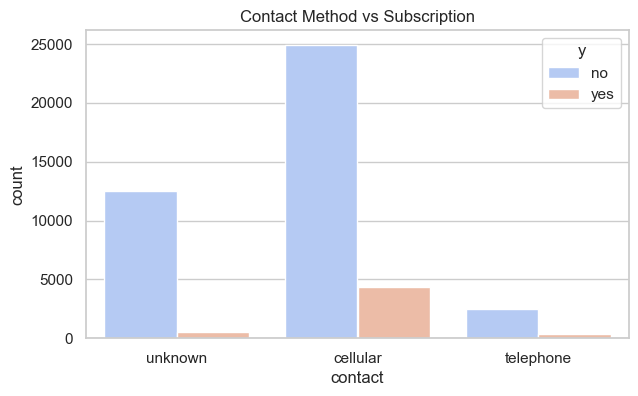

In [15]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='contact', hue='y', palette='coolwarm')
plt.title("Contact Method vs Subscription")
plt.show()

#### Customers contacted via cellular show better subscription rates

## 9. Previous outcome vs Subscription

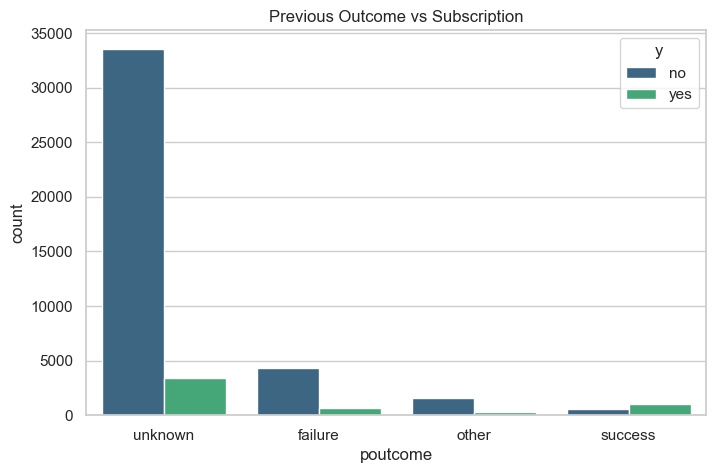

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='poutcome', hue='y', palette='viridis')
plt.title("Previous Outcome vs Subscription")
plt.show()

#### Successful outcomes in prior campaigns drastically improve subscription chances

## 10. Duration vs Subscription

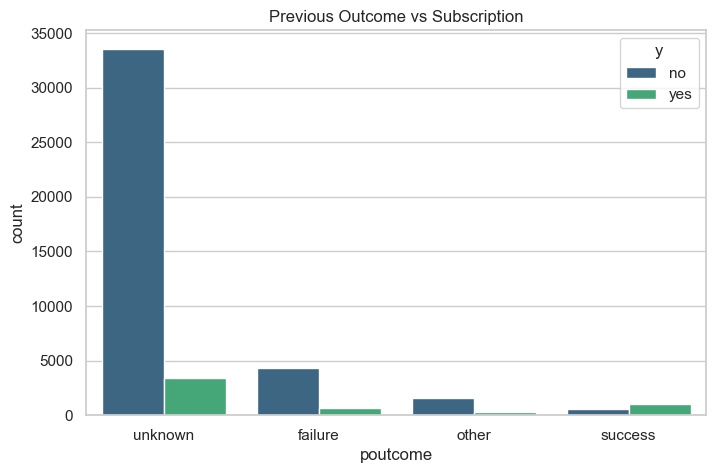

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='poutcome', hue='y', palette='viridis')
plt.title("Previous Outcome vs Subscription")
plt.show()

#### Longer call durations often lead to a 'yes' decision — indicating interest builds over time.

### Pair Plot (Scatter Matrix)

selected_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']
df_pairplot = df[selected_features].copy()
df_pairplot['y'] = df_pairplot['y'].map({'yes': 1, 'no': 0})

sns.pairplot(df_pairplot.sample(500), hue='y', palette='Set2', corner=True)
plt.suptitle("Pairplot of Selected Features Colored by Subscription", y=1.02)
plt.show()

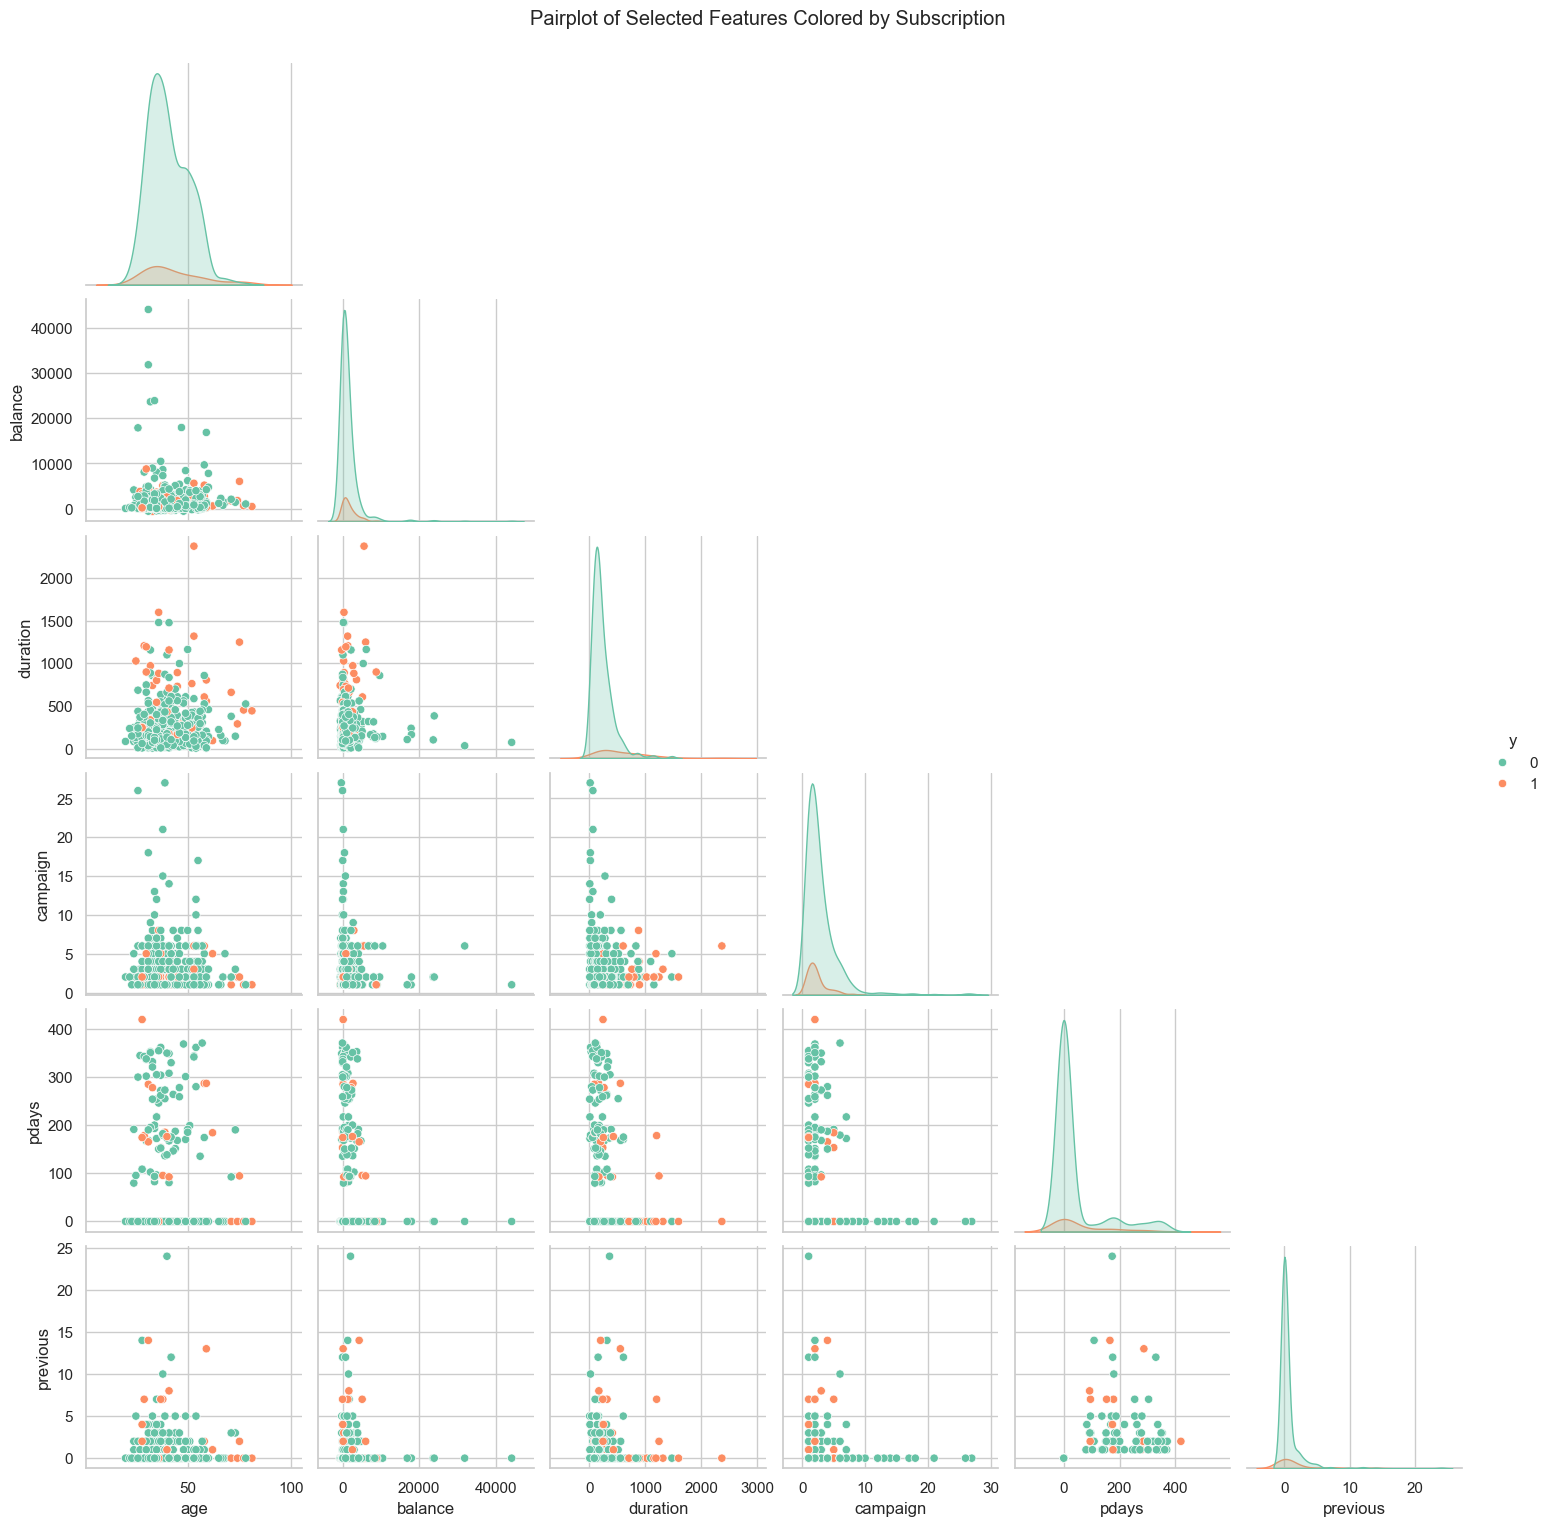

In [18]:
selected_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']
df_pairplot = df[selected_features].copy()
df_pairplot['y'] = df_pairplot['y'].map({'yes': 1, 'no': 0})

sns.pairplot(df_pairplot.sample(500), hue='y', palette='Set2', corner=True)
plt.suptitle("Pairplot of Selected Features Colored by Subscription", y=1.02)
plt.show()

### 📊 Key Observations:

* duration forms distinct clusters for subscribed (yes) vs not (no) customers.

* Subscribed customers tend to lie in higher ranges of duration and sometimes higher balances.

* No strong linear patterns between other variables and y.

### Modelling  

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import plotly.express as px
import plotly.graph_objects as go

# Make a copy for processing
data = df.copy()

# Data Cleansing
data.columns = data.columns.str.strip()
data.replace("unknown", np.nan, inplace=True)
missing = data.isnull().sum()

# Impute missing categorical values with mode
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical variables
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('y')  # target variable
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Encode target
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Standardize numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('y')
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Prepare data with and without duration
X_all = data.drop('y', axis=1)
y = data['y']
X_with_duration = X_all.copy()
X_without_duration = X_all.drop('duration', axis=1)

# Train/test split
X_train_wd, X_test_wd, y_train, y_test = train_test_split(X_with_duration, y, test_size=0.2, random_state=42)
X_train_wod, X_test_wod, _, _ = train_test_split(X_without_duration, y, test_size=0.2, random_state=42)

# Model training
lr_wd = LogisticRegression(max_iter=1000).fit(X_train_wd, y_train)
rf_wd = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_wd, y_train)

lr_wod = LogisticRegression(max_iter=1000).fit(X_train_wod, y_train)
rf_wod = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_wod, y_train)

# Model evaluation
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"=== {label} ===")
    print(classification_report(y_test, y_pred))
    return roc_auc_score(y_test, y_proba), roc_curve(y_test, y_proba)

# Evaluate all models
scores = {}
roc_curves = {}

for name, model, X in [
    ("LR with duration", lr_wd, X_test_wd),
    ("RF with duration", rf_wd, X_test_wd),
    ("LR w/o duration", lr_wod, X_test_wod),
    ("RF w/o duration", rf_wod, X_test_wod),
]:
    auc, roc = evaluate_model(model, X, y_test, name)
    scores[name] = auc
    roc_curves[name] = roc

scores

=== LR with duration ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.30      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043

=== RF with duration ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.41      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

=== LR w/o duration ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.16      0.26      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.57      0.60      9043


{'LR with duration': np.float64(0.8781105514848947),
 'RF with duration': np.float64(0.918170341941659),
 'LR w/o duration': np.float64(0.7064076715102716),
 'RF w/o duration': np.float64(0.7677658526779375)}

#### We trained models, and found Random Forest with duration to be the best

##  Final Model & Predictions

In [20]:
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_wd, y_train)
y_pred = final_model.predict(X_test_wd)
y_proba = final_model.predict_proba(X_test_wd)[:, 1]

## Interactive Dashboard

In [21]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output

In [23]:
# Feature importances (Random Forest with duration)
feature_importance = rf_wd.feature_importances_
features = X_with_duration.columns

# AUC scores sorted
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# App layout
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("ABC Bank Term Deposit Prediction Dashboard"),
    
    html.H3("Model AUC Scores"),
    dcc.Graph(
        figure=go.Figure(
            data=[go.Bar(
                x=[s[0] for s in sorted_scores],
                y=[s[1] for s in sorted_scores],
                marker_color='indianred'
            )],
            layout_title_text="AUC Comparison Across Models"
        )
    ),

    html.H3("Random Forest (with Duration) - Feature Importances"),
    dcc.Graph(
        figure=go.Figure(
            data=[go.Bar(
                x=features,
                y=feature_importance,
                marker_color='teal'
            )],
            layout_title_text="Top Predictive Features"
        )
    ),

    html.H3("Select Model for ROC Curve"),
    dcc.Dropdown(
        id='model-dropdown',
        options=[{'label': k, 'value': k} for k in roc_curves.keys()],
        value='RF with duration'
    ),

    dcc.Graph(id='roc-curve')
])

# Callback for ROC Curve
@app.callback(
    Output('roc-curve', 'figure'),
    Input('model-dropdown', 'value')
)
def update_roc(selected_model):
    fpr, tpr, _ = roc_curves[selected_model]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
    fig.update_layout(title=f'ROC Curve: {selected_model}', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
    return fig


app.run_server(mode='inline', port=8051)


### Summary

ABC Bank aims to predict customer subscription to its term deposit product using past interaction data. Analysis shows that customers in management or technician roles and those with tertiary education are more likely to subscribe. Additionally, a longer call duration and positive outcomes from previous campaigns strongly correlate with successful subscriptions.

The 'duration' feature forms clear clusters between subscribed and non-subscribed customers and shows higher subscription rates at longer durations and higher balances.

Model evaluation confirms that the Random Forest model with 'duration' delivers the best performance, achieving a high ROC-AUC of 0.918.

By leveraging key customer attributes and call interaction details, ABC Bank can significantly improve its targeting strategy, drive higher conversion rates, and optimize marketing costs.
